In [1]:
import numpy as np 
import os
import os.path as osp
import scipy.io as scio 
import matplotlib.pyplot as plt

In [9]:
masks_dir = "./test_datasets/mask"

# Open random_mask.mat
mask_dict = scio.loadmat(f"{masks_dir}/random_mask.mat")
mask = np.array(mask_dict["mask"], dtype=np.float32)
print(mask.shape)

(256, 256, 8)


In [7]:
# Load first_mask.bmp
k = 2
f_mask = plt.imread(f"./trial_coded_exposure_{k}x{k}.bmp")
f_mask = f_mask[:,:,0]
f_mask = np.array(f_mask, dtype=np.float32)
f_mask = np.reshape(f_mask, (k * k, 256, 256))
print(f_mask.shape)

FileNotFoundError: [Errno 2] No such file or directory: './trial_coded_exposure_2x2.bmp'

In [ ]:
# Save f_mask like {mask_dict}
# (f, h, w) -> (h, w, f)
to_save = np.transpose(f_mask, (1, 2, 0))

# 0 or 1
to_save = to_save // 255
# Integer
to_save = np.array(to_save, dtype=np.uint8)
# scio.savemat(f"{masks_dir}/{k}x{k}_mask.mat", {"mask": to_save})

In [10]:
to_save = scio.loadmat(f"{masks_dir}/2x2_mask.mat")["mask"]

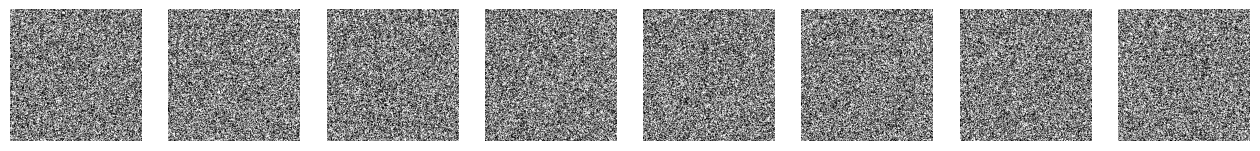

In [5]:
# 256 x 256 x 8
fig, axs = plt.subplots(1, 8, figsize=(16, 2))
for i in range(8):
    axs[i].imshow(mask[:, :, i], cmap="gray")
    axs[i].axis("off")
plt.show()

In [1]:
import os
import numpy as np
import scipy.io as scio
from pathlib import Path
import cv2

sim_dir = "./test_datasets/simulation"
output_dir = "./dps_cacti"
os.makedirs(output_dir, exist_ok=True)

data_list = os.listdir(sim_dir)
for index in range(len(data_list)):
    pic = scio.loadmat(os.path.join(sim_dir, data_list[index]))
    if "orig" in pic:
        pic = pic['orig']
    elif "patch_save" in pic:
        pic = pic['patch_save']
    elif "p1" in pic:
        pic = pic['p1']
    elif "p2" in pic:
        pic = pic['p2']
    elif "p3" in pic:
        pic = pic['p3']
    pic = pic / 255

    # 256 x 256 x 32 -> 32 x 256 x 256
    pic = np.transpose(pic, [2, 0, 1])
    print(pic.shape)

    # TODO: Save first 16 images if pic.shape[0] >= 16
    if pic.shape[0] >= 16:
        save_dir = os.path.join(output_dir, f"0000{index}")
        Path(save_dir).mkdir(parents=True, exist_ok=True)
        
        for i in range(pic.shape[0]):
            img = (pic[i] * 255).astype(np.uint8)  # Convert to 8-bit image
            save_path = os.path.join(save_dir, f"image_{i:02d}.png")
            cv2.imwrite(save_path, img)
        print(f"Saved: {save_dir}")    

(32, 256, 256)
Saved: ./dps_cacti/00000
(32, 256, 256)
Saved: ./dps_cacti/00001
(32, 256, 256)
Saved: ./dps_cacti/00002
(48, 256, 256)
Saved: ./dps_cacti/00003
(16, 256, 256)
Saved: ./dps_cacti/00004
(8, 256, 256)
(8, 256, 256)


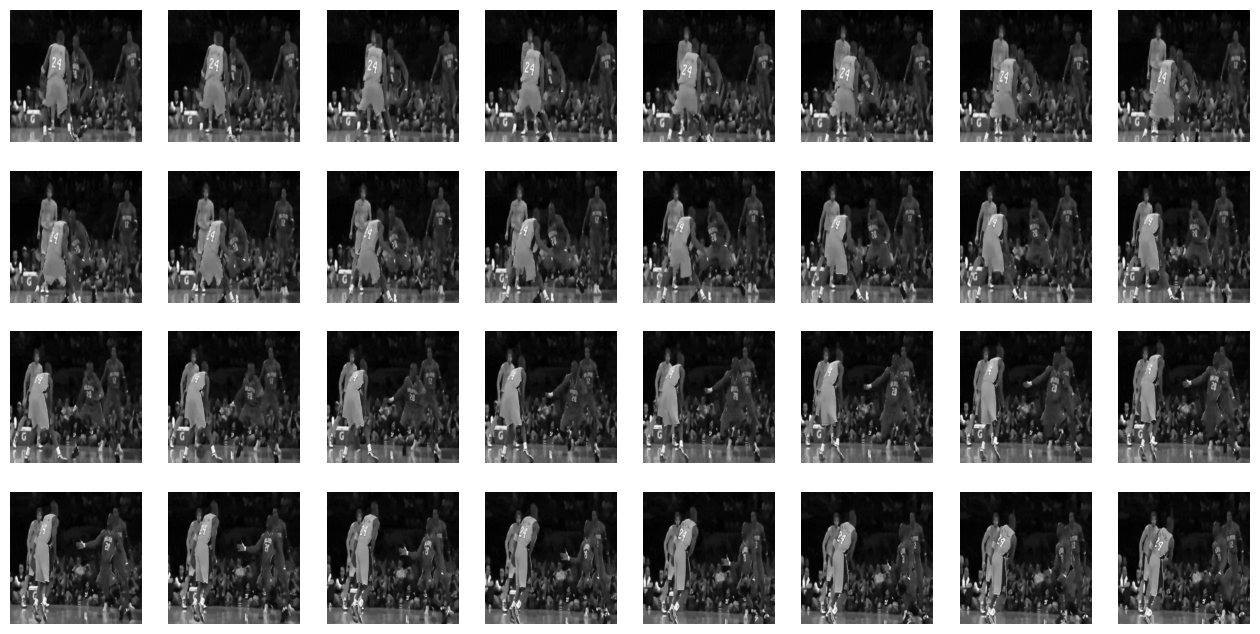

In [5]:
# Plot pic
fig, axs = plt.subplots(4, 8, figsize=(16, 8))
for i in range(32):
    axs[i // 8, i % 8].imshow(pic[i], cmap="gray")
    axs[i // 8, i % 8].axis("off")
plt.show()

In [4]:
import cv2
data_root = '/scratch/ondemand28/dsaragih/datasets/TestDAVIS/JPEGImages/480p'
split_root = osp.join(osp.dirname(osp.dirname(data_root)),"ImageSets/2017")
save_root = '/scratch/ondemand28/dsaragih/datasets/TestDAVIS'
val_list = set()

with open(osp.join(split_root, "test-dev.txt"), "r") as f:
    val_list = set(line.strip() for line in f.readlines())

for image_dir in os.listdir(data_root):
    # Check if the directory is in the validation list
    if image_dir not in val_list:
        continue

    # Path to the current image directory
    train_data_path = osp.join(data_root, image_dir)
    data_path = os.listdir(train_data_path)
    data_path.sort()

    # List to store the image data
    images = []

    # Read and store each image
    for image_name in data_path:
        image_path = osp.join(train_data_path, image_name)
        image = cv2.imread(image_path)  # Read the image using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)[:, :, 0]
        image = image.astype(np.float32) / 255.0  # Normalize the image
        # Resize to 256 x 256
        image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_CUBIC)
        if image is not None:
            images.append(image)

    # Convert the list of images to a numpy array
    images_array = np.array(images)
    images_array = np.transpose(images_array, (1, 2, 0))

    # Save the images to a .mat file
    os.makedirs(osp.join(save_root, "TestImages"), exist_ok=True)
    save_path = osp.join(save_root, "TestImages", f"{image_dir}.mat")
    scio.savemat(save_path, {'orig': images_array})
    print(f"Shape of the images array: {images_array.shape}")
    print(f"Saved {len(images)} images to {save_path}")
    print('-'*50)

Shape of the images array: (256, 256, 79)
Saved 79 images to /scratch/ondemand28/dsaragih/datasets/TestDAVIS/TestImages/deer.mat
--------------------------------------------------
Shape of the images array: (256, 256, 60)
Saved 60 images to /scratch/ondemand28/dsaragih/datasets/TestDAVIS/TestImages/slackline.mat
--------------------------------------------------
Shape of the images array: (256, 256, 81)
Saved 81 images to /scratch/ondemand28/dsaragih/datasets/TestDAVIS/TestImages/hoverboard.mat
--------------------------------------------------
Shape of the images array: (256, 256, 49)
Saved 49 images to /scratch/ondemand28/dsaragih/datasets/TestDAVIS/TestImages/helicopter.mat
--------------------------------------------------
Shape of the images array: (256, 256, 85)
Saved 85 images to /scratch/ondemand28/dsaragih/datasets/TestDAVIS/TestImages/chamaleon.mat
--------------------------------------------------
Shape of the images array: (256, 256, 72)
Saved 72 images to /scratch/ondemand

In [6]:
data_root = '/scratch/ondemand28/dsaragih/datasets/TestDAVIS'
frames = scio.loadmat(osp.join(data_root, "TestImages", "gym.mat"))["orig"]

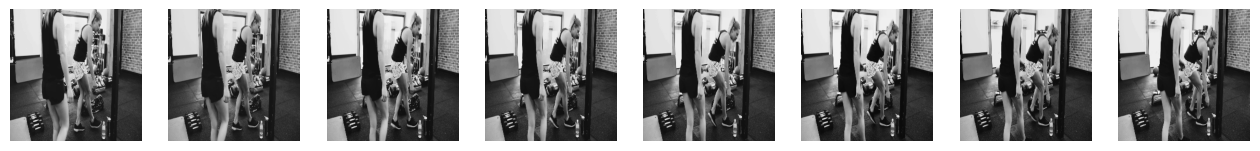

In [7]:
# Show images
fig, axs = plt.subplots(1, 8, figsize=(16, 2))
for i in range(8):
    axs[i].imshow(frames[:, :, i], cmap="gray")
    axs[i].axis("off")

In [19]:
# Save png images
for i in range(32):
    plt.imsave(f"/u8/d/dsaragih/diffusion-posterior-sampling/data/cacti/00001/crash32_cacti_{str(i).zfill(5)}.png", pic[i], cmap="gray")

In [58]:
vid_dir = "./test_datasets/simulation/00001"
# Consists of frame_00000.png, ..., frame_00015.png
import cv2
frames = []
for i in range(16):
    # Read image grayscale, resize to 256 x 256
    frame = cv2.imread(f"{vid_dir}/frame_{str(i).zfill(5)}.png", cv2.IMREAD_GRAYSCALE)
    frame = cv2.resize(frame, (256, 256))
    frames.append(frame)
frames = np.array(frames)
print(frames.shape)

(16, 256, 256)


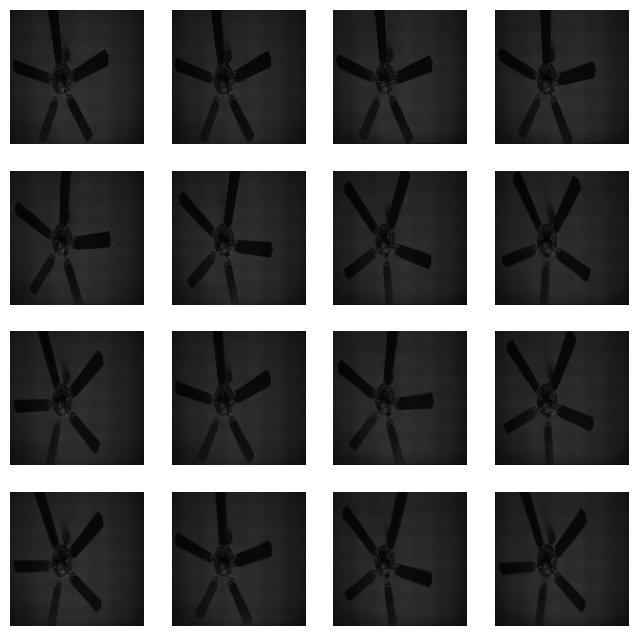

In [ ]:
# Plot the frames
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(frames[i*4+j], cmap="gray")
        axs[i, j].axis("off")
plt.show()

In [64]:
# Transpose then save as .mat
orig = np.transpose(frames, (1, 2, 0))
mask = np.tile(to_save, (1, 1, 4))
print(mask.shape)
meas = orig * mask

(256, 256, 16)


In [68]:
scio.savemat(f"{sim_dir}/fan.mat", {"mask": mask, "meas": meas, "orig": orig})

In [20]:
from cacti.utils.mask import generate_masks
from cacti.datasets.builder import build_dataset 
from cacti.utils.config import Config
from torch.utils.data import DataLoader

cfg = Config.fromfile("configs/STFormer/stformer_base_test.py")

mask,mask_s = generate_masks(cfg.test_data.mask_path,cfg.test_data.mask_shape)
train_data = build_dataset(cfg.train_data,{"mask":mask})
test_data = build_dataset(cfg.test_data,{"mask":mask})

train_data_loader = DataLoader(dataset=train_data, 
                                batch_size=cfg.data.samples_per_gpu,
                                shuffle=True,
                                num_workers = cfg.data.workers_per_gpu)

mask shape: (256, 256, 4)
post mask shape: (256, 256, 4)


In [22]:
test_data_loader = DataLoader(test_data,1,shuffle=False,num_workers=4)
test_sample = next(iter(test_data_loader))
test_sample[0].shape, test_sample[1].shape

(torch.Size([1, 13, 256, 256]), torch.Size([1, 13, 4, 256, 256]))

In [12]:
test_data.data_name_list[0]

'guitar-violin.mat'

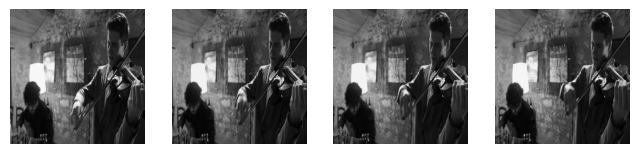

In [29]:
# Plot test_sample
meas, gt = test_sample
gt = gt[0].numpy()
meas = meas[0].float().numpy()
fig, axs = plt.subplots(1, 4, figsize=(8, 4))
for i in range(4):
    axs[i].imshow(gt[0, i], cmap="gray")
    axs[i].axis("off")